<a href="https://www.kaggle.com/code/ahmdmhmd/image-classification?scriptVersionId=249237115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

2025-07-07 12:06:50.256310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751890010.538322      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751890010.621519      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
classes_label = {class_label:i for i, class_label in enumerate(classes)}
classes_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [4]:
IMAGE_SIZE = (150, 150)

# Read Data 

In [5]:
def load_data():

    datasets = ['/kaggle/input/intel-image-classification/seg_train/seg_train',
    '/kaggle/input/intel-image-classification/seg_test/seg_test']

    output = []

    for dataset in datasets:
        images = []
        labels = []

        print("Loading {}".format(dataset))

        for folder in os.listdir(dataset):
            label = classes_label[folder]

            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(dataset, folder, file)

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, IMAGE_SIZE)

                images.append(img)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        output.append((images, labels))

    return output

In [6]:
(train_images,train_labels), (test_images,test_labels) = load_data()

Loading /kaggle/input/intel-image-classification/seg_train/seg_train


100%|██████████| 2404/2404 [00:22<00:00, 104.86it/s]


Loading /kaggle/input/intel-image-classification/seg_test/seg_test


100%|██████████| 553/553 [00:04<00:00, 123.35it/s]


In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [8]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


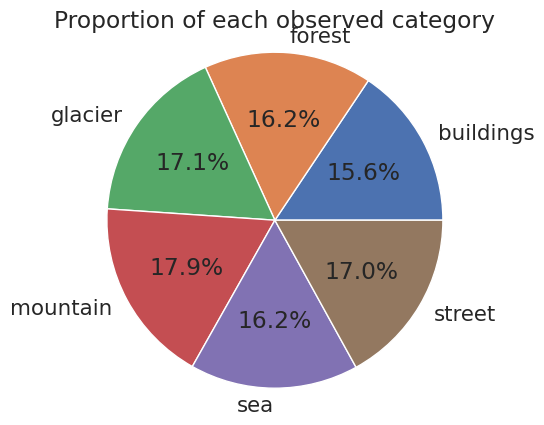

In [9]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=classes,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

### data balanced

In [10]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# show random image

In [11]:
def show_random_image(classes, images, labels):

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + classes[labels[index]])
    plt.show()

classes = number of class

train_images = random of image

train_labels = random of folders 

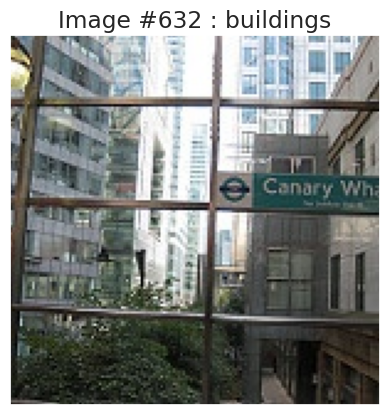

In [12]:
show_random_image(classes, train_images, train_labels) # 

In [13]:
def display_examples(classes, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes[labels[i]])
    plt.show()

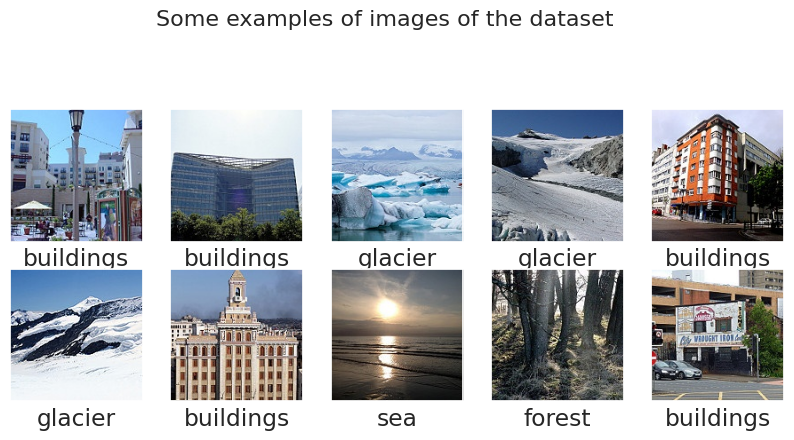

In [14]:
display_examples(classes, train_images, train_labels)

# CNN and Evaluation

In [15]:
# cnn_model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(6, activation=tf.nn.softmax)
# ])

In [16]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),   # طبقة Conv إضافية
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # زودنا Dropout

    tf.keras.layers.Dense(6, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-07 12:09:52.973950: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# history = cnn_model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = cnn_model.fit(train_images, train_labels,
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2,
                        callbacks=[early_stop])

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.3958 - loss: 1.5448 - val_accuracy: 0.6295 - val_loss: 0.9732
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.6339 - loss: 0.9702 - val_accuracy: 0.7072 - val_loss: 0.7796
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.7096 - loss: 0.7877 - val_accuracy: 0.7688 - val_loss: 0.6319
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.7520 - loss: 0.6836 - val_accuracy: 0.7560 - val_loss: 0.6611
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.7848 - loss: 0.5887 - val_accuracy: 0.7652 - val_loss: 0.6245
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.8147 - loss: 0.5304 - val_accuracy: 0.7777 - val_loss: 0.6125
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.8301 - loss: 0.4718 - val_accuracy: 0.8172 - val_loss: 0.5221
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.8594 - loss: 0.4023 - val_accuracy: 0.8251 - v

94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step


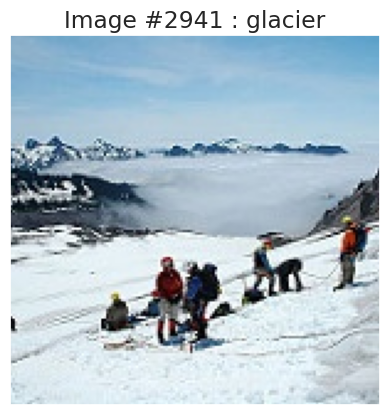

In [28]:
predictions = cnn_model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

show_random_image(classes, test_images, pred_labels)